-----------------
属于：Containers
-----------------

---------------------

**Sequential是什么？**

可以理解为一个写好的神经网络模型，它长这样↓

In [ ]:
model = nn.Sequential(
    OrderedDict(
        [
            ("conv1", nn.Conv2d(1, 20, 5)),
            ("relu1", nn.ReLU()),
            ("conv2", nn.Conv2d(20, 64, 5)),
            ("relu2", nn.ReLU()),
        ]
    )
)

**接下来完成的任务：对CIRFAR10进行简单的分类**

CIFAR10model网络结构可视化：

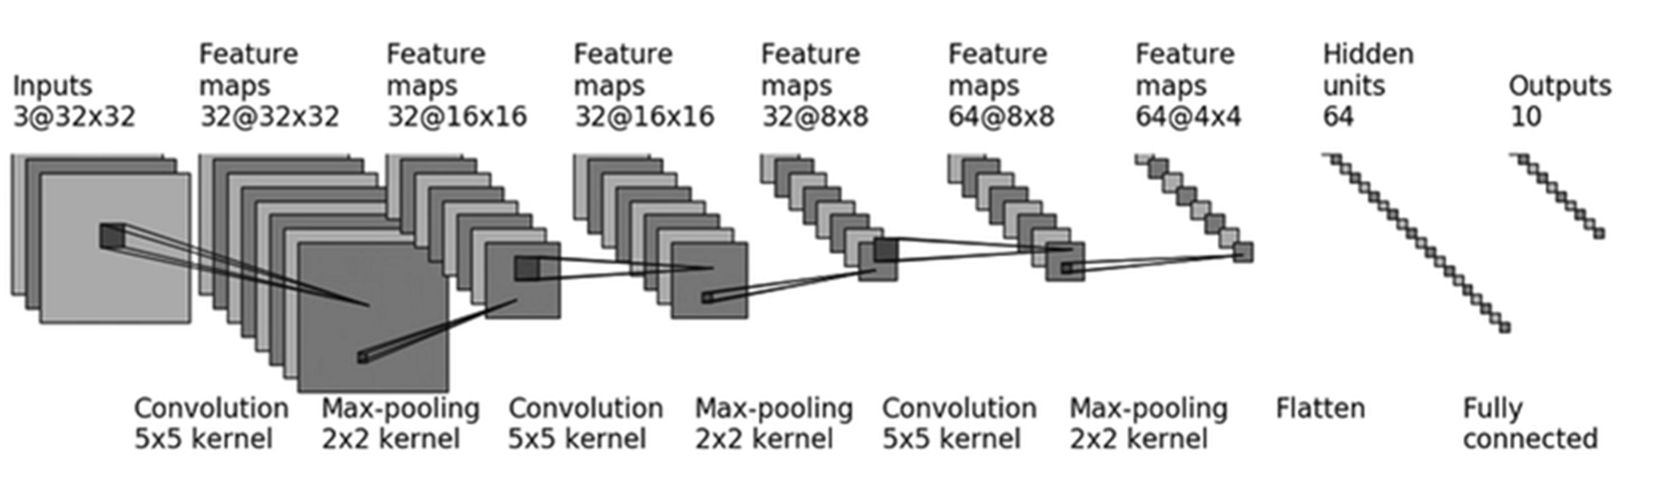

<span style="color:green">现在我们尝试自己来写一下这个网络</span>

In [23]:
import torch
from torch import nn
from torch.nn import Conv2d, MaxPool2d, Flatten,Sequential, Linear

class Tudui(nn.Module):
    def __init__(self):
        super(Tudui, self).__init__()
        # self.conv2d1=Conv2d(in_channels=3, out_channels=32, kernel_size=5,dilation=1, stride=1, padding=2)  #这里的stride和padding都需要计算得来->有没有不需要计算的方法？
        # self.maxpool1=MaxPool2d(kernel_size=2)
        # self.conv2d2=Conv2d(in_channels=32, out_channels=32,kernel_size=5, dilation=1, stride=1, padding=2)
        # self.maxpool2=MaxPool2d(kernel_size=2)
        # self.conv2d3=Conv2d(in_channels=32, out_channels=64, kernel_size=5, padding=2)
        # self.maxpool3=MaxPool2d(kernel_size=2)
        # self.flatten=Flatten()
        # self.linear1=Linear(in_features=64*4*4, out_features=64)
        # self.linear2=Linear(in_features=64, out_features=10)

        self.model1=Sequential(
            Conv2d(in_channels=3, out_channels=32, kernel_size=5,dilation=1, stride=1, padding=2) ,
            MaxPool2d(kernel_size=2),
            Conv2d(in_channels=32, out_channels=32,kernel_size=5, dilation=1, stride=1, padding=2),
            MaxPool2d(kernel_size=2),
            Conv2d(in_channels=32, out_channels=64, kernel_size=5, padding=2),
            MaxPool2d(kernel_size=2),
            Flatten(),
            Linear(in_features=64*4*4, out_features=64),
            Linear(in_features=64, out_features=10)
        )
    def forward(self, x):
        # x = self.conv2d1(x)
        # x = self.maxpool1(x)
        # x = self.conv2d2(x)
        # x = self.maxpool2(x)
        # x = self.conv2d3(x)
        # x = self.maxpool3(x)
        # x = self.flatten(x)
        # x = self.linear1(x)
        # x = self.linear2(x)

        x = self.model1(x)
        return x


-------------------

In [ ]:
#接下来要检验网络的正确性
tudui=Tudui()
input = torch.ones((100, 3, 32, 32))
output = tudui(input)
print(output.shape)

torch.Size([100, 10])


In [ ]:
#网络可视化
from torch.utils.tensorboard import SummaryWriter
writer = SummaryWriter("logs/seq")
writer.add_graph(tudui, input)
writer.close()